FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


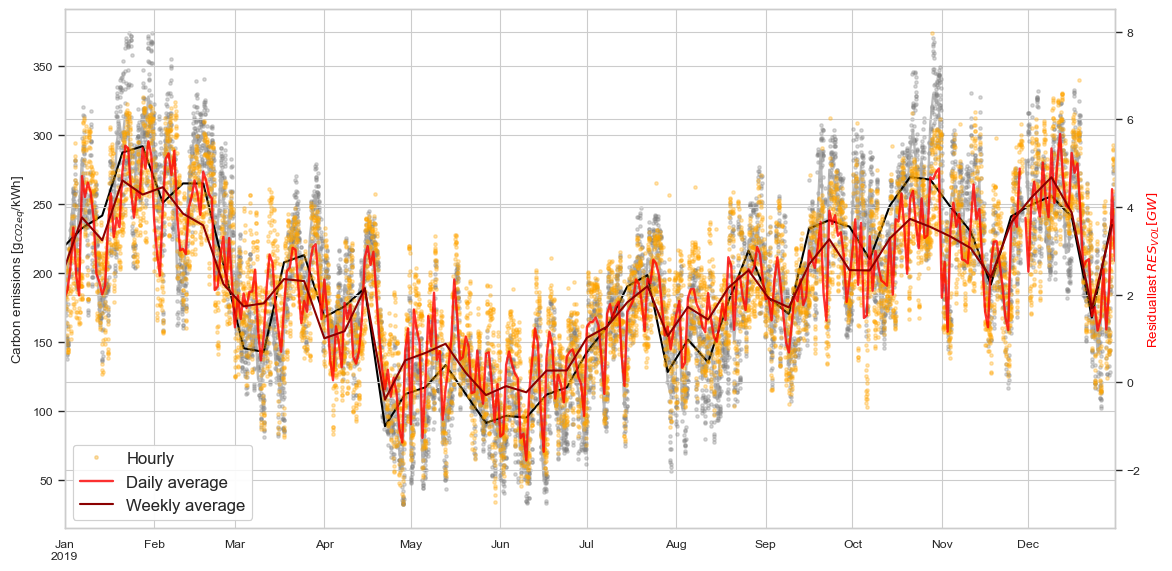

In [2]:
from importlib import reload
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("..\\")
sys.path
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
import FLUCCOplus.plots as fpp
import FLUCCOplus.scenarios as fps

df = elmap.fetch(year=2019)
df.columns

s = fps.Scenario("EM2019", em_base=2019)
fig, ax = plt.subplots(1,1, figsize=(12,6))
fig = fpp.plot_HDW(df,  ax=ax, fig=fig, figsize=(12,6),
                    
             colors=["grey", "darkgray", "black"])
#ax.set_ylim(0,400)
ax2 = ax.twinx()
ax2.set_ylabel('Residuallast $RES_{VOL} [GW]$', color='red')
fig = fpp.plot_HDW(-s.TSD, "RES0", 
             "Residuallast $RES_{VOL} [GW]$", 
             colors=["orange", "red", "darkred"], 
             figsize=(12,6),ax=ax2, fig=fig)


In [3]:
import seaborn as sns
import numpy as np
co2 = df["carbon_intensity_avg"]
res0 = -s.TSD.RES0
res1 = s.TSD.RES1
x = res0
y = co2



In [4]:
rel = pd.DataFrame({"co2": df["carbon_intensity_avg"], "res0":-s.TSD.RES0})
rel["month"] = rel.index.month


Text(45.070219907407406, 0.5, 'Emissionsintensität[g$_{CO2eq}$/kWh]')

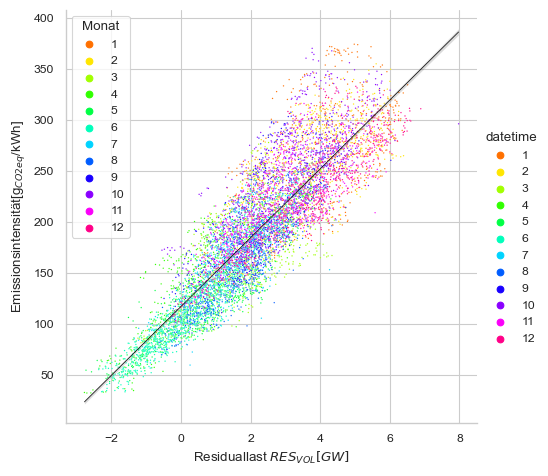

In [37]:
br = sns.color_palette("plasma", 6)
rb = sns.color_palette("plasma", 6) # coolwarm
 # Set the middle color to blue
pal = br + br[::-1]
pal = sns.color_palette("hsv", 12)

ax = sns.relplot(data=rel, x="res0", y="co2", hue=rel.index.month, s=1, alpha=1, palette=pal)
#ax = sns.regplot(x=res0,y=co2, line_kws=dict(linewidth=0.5, color="black"), scatter_kws={'alpha':0.5,"s":0.0, "color":"grey"}, order=2, ci=99)
ax = sns.regplot(x=res0,y=co2, line_kws=dict(linewidth=0.5, color="black"), scatter_kws={'alpha':0.0, "color":"grey"}, order=1, ci=99)


ax.legend().set_title("Monat")
ax.set_xlabel("Residuallast $RES_{VOL} [GW]$")
ax.set_ylabel("Emissionsintensität[g$_{CO2eq}$/kWh]")
#sns.relplot(data=rel, x="res0", y="co2", hue=rel.index.month, alpha=0.2, palette=pal)

In [6]:
ci = df["carbon_intensity_avg"]
ci.head()

datetime
2019-01-01 00:00:00+00:00    218.020634
2019-01-01 01:00:00+00:00    202.499213
2019-01-01 02:00:00+00:00    196.650562
2019-01-01 03:00:00+00:00    187.806061
2019-01-01 04:00:00+00:00    185.124728
Freq: H, Name: carbon_intensity_avg, dtype: float64

In [7]:
df_co = df[elmap.cops].rename(columns=dict(zip(elmap.cops, elmap.SOURCES)))
df_co = df_co / 100
df_co["battery_discharge"] = 0.
df_co.head()


,biomass,hydro,solar,wind,geothermal,coal,gas,nuclear,oil,unknown,battery_discharge,hydro_discharge
datetime,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,0.092805,0.033891,0.0,0.009436,0.000003,0.528143,0.282725,0.007536,0.000781,0.044680,0.0,0.0
2019-01-01 01:00:00+00:00,0.102845,0.039943,0.0,0.010370,0.000004,0.557772,0.233840,0.007907,0.001138,0.046183,0.0,0.0
2019-01-01 02:00:00+00:00,0.107535,0.041973,0.0,0.011352,0.000004,0.554907,0.230555,0.007480,0.001101,0.045094,0.0,0.0
2019-01-01 03:00:00+00:00,0.112646,0.043966,0.0,0.012937,0.000004,0.569499,0.205173,0.007739,0.001007,0.047029,0.0,0.0
2019-01-01 04:00:00+00:00,0.112050,0.042759,0.0,0.014350,0.000004,0.574637,0.199784,0.007806,0.001046,0.047564,0.0,0.0


<Axes: xlabel='datetime'>

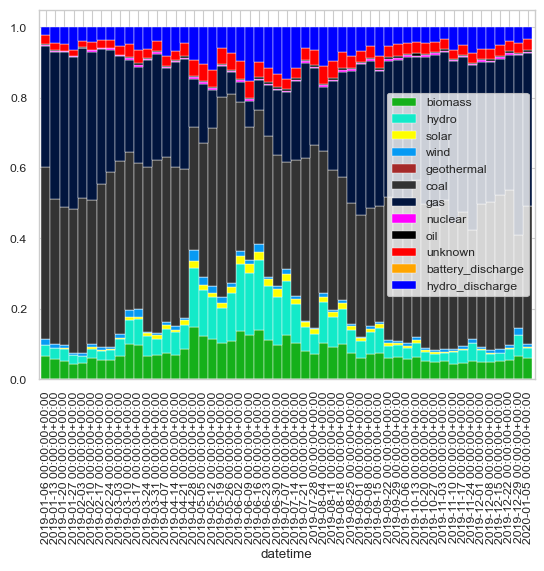

In [8]:

df_co.resample("W").mean().plot(kind="bar", stacked=True, color=elmap.carrier_colors.values(), linewidth=0.3, width=1)


<Axes: xlabel='datetime'>

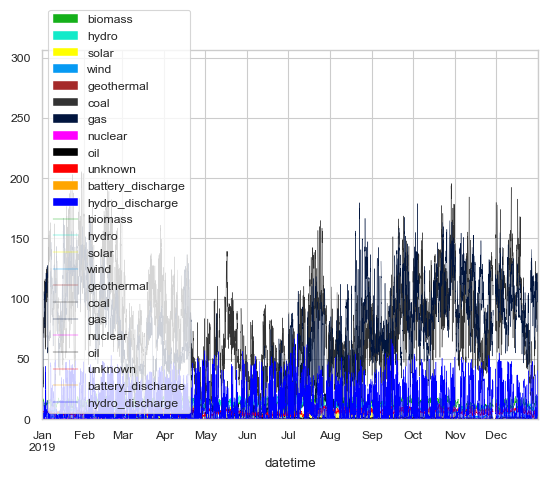

In [9]:
df_ci = df_co.multiply(df["carbon_intensity_avg"], axis=0)

ax = df_ci.resample("W").mean().plot(kind="bar", stacked=True, color=elmap.carrier_colors.values(), linewidth=0.3, width=1)
df_ci.plot(ax=ax, kind="line", color=elmap.carrier_colors.values(), linewidth=0.3)

In [10]:

df = pd.read_excel("C:/Users/Simon Schneider/Code/FLUCCOplus/data/raw/korrelation.xlsx", decimal=",", index_col="Stunde")
df.head()
df.index = rel.index

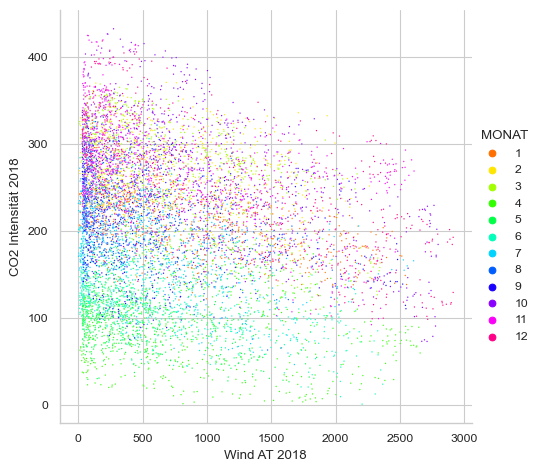

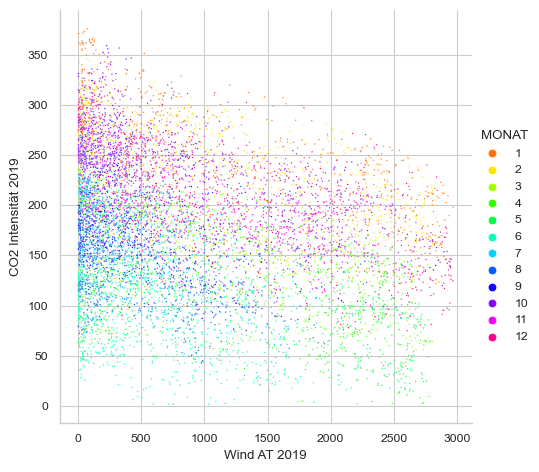

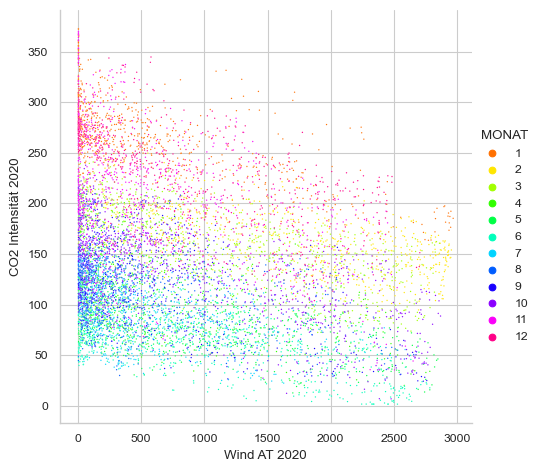

In [11]:
sns.relplot(df, x="Wind AT 2018", y="CO2 Intensität 2018",hue="MONAT", s=1, alpha=1, palette=pal)
sns.relplot(df, x="Wind AT 2019", y="CO2 Intensität 2019",hue="MONAT", s=1, alpha=1, palette=pal)
sns.relplot(df, x="Wind AT 2020", y="CO2 Intensität 2020",hue="MONAT", s=1, alpha=1, palette=pal)

C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\2558722753.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['Year'] = 2018
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\2558722753.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019['Year'] = 2019
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\2558722753.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

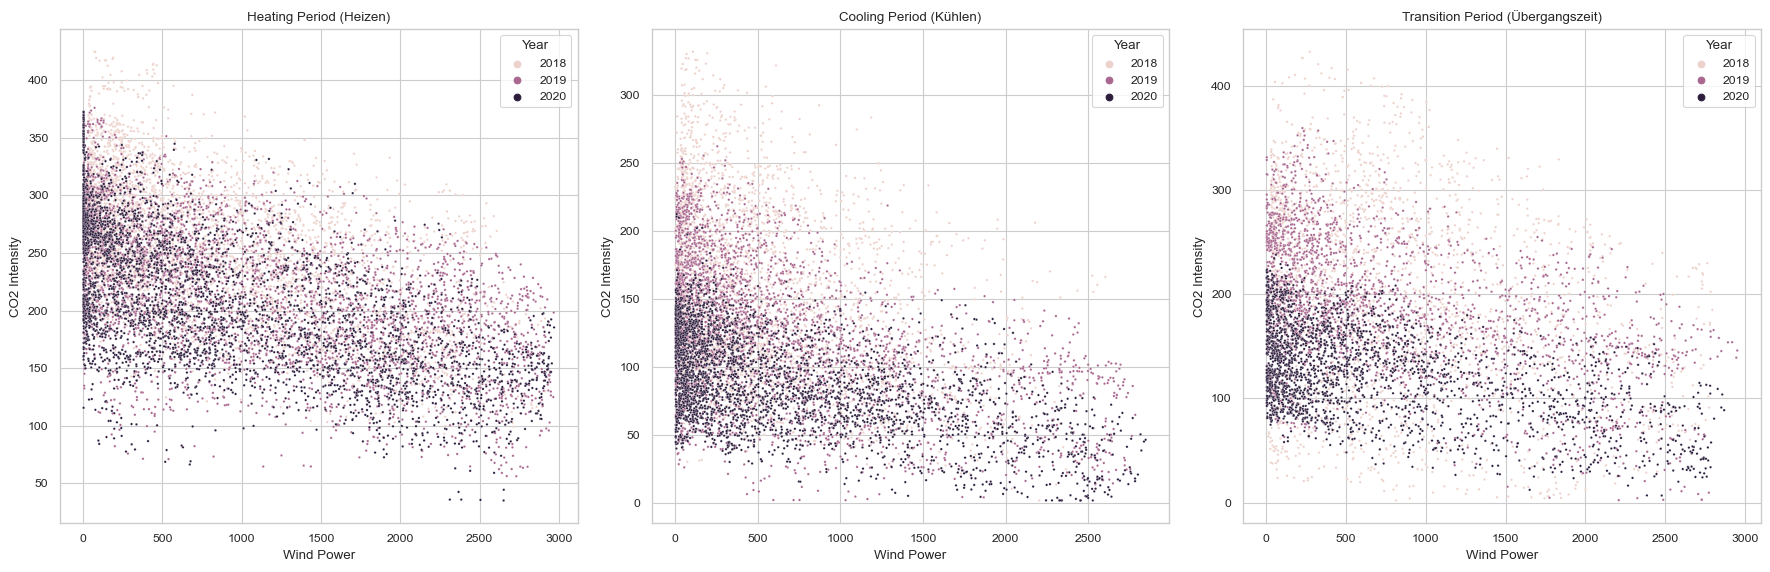

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = df

# Selecting relevant columns for 2018, 2019, and 2020
data_2018 = data[['Wind AT 2018', 'CO2 Intensität 2018', 'Heizen', 'Kühlen', "MONAT"]]
data_2019 = data[['Wind AT 2019', 'CO2 Intensität 2019', 'Heizen', 'Kühlen', "MONAT"]]
data_2020 = data[['Wind AT 2020', 'CO2 Intensität 2020', 'Heizen', 'Kühlen', "MONAT"]]

# Renaming columns for consistency
data_2018.columns = data_2019.columns = data_2020.columns = ['Wind Power', 'CO2 Intensity', 'Heizen', 'Kühlen', "MONAT"]

# Adding year column
data_2018['Year'] = 2018
data_2019['Year'] = 2019
data_2020['Year'] = 2020

# Combining the data
combined_data = pd.concat([data_2018, data_2019, data_2020])

# Separating the data based on conditions
heating_data = combined_data[combined_data['Heizen']]
cooling_data = combined_data[combined_data['Kühlen'] == 1]
transition_data = combined_data[(combined_data['Heizen'] == False) & (combined_data['Kühlen'] == 0)]

# Creating scatter plots
plt.figure(figsize=(18, 6))

# Scatter plot for Heating Period
plt.subplot(1, 3, 1)
sns.scatterplot(data=heating_data, x='Wind Power', y='CO2 Intensity', hue='Year',  s=3, alpha=1, )
plt.title('Heating Period (Heizen)')
plt.xlabel('Wind Power')
plt.ylabel('CO2 Intensity')

# Scatter plot for Cooling Period
plt.subplot(1, 3, 2)
sns.scatterplot(data=cooling_data, x='Wind Power', y='CO2 Intensity',  hue='Year', s=3, alpha=1, )
plt.title('Cooling Period (Kühlen)')
plt.xlabel('Wind Power')
plt.ylabel('CO2 Intensity')

# Scatter plot for Transition Period
plt.subplot(1, 3, 3)
sns.scatterplot(data=transition_data, x='Wind Power', y='CO2 Intensity',  hue='Year', s=3, alpha=1)
plt.title('Transition Period (Übergangszeit)')
plt.xlabel('Wind Power')
plt.ylabel('CO2 Intensity')

plt.tight_layout()
plt.show()


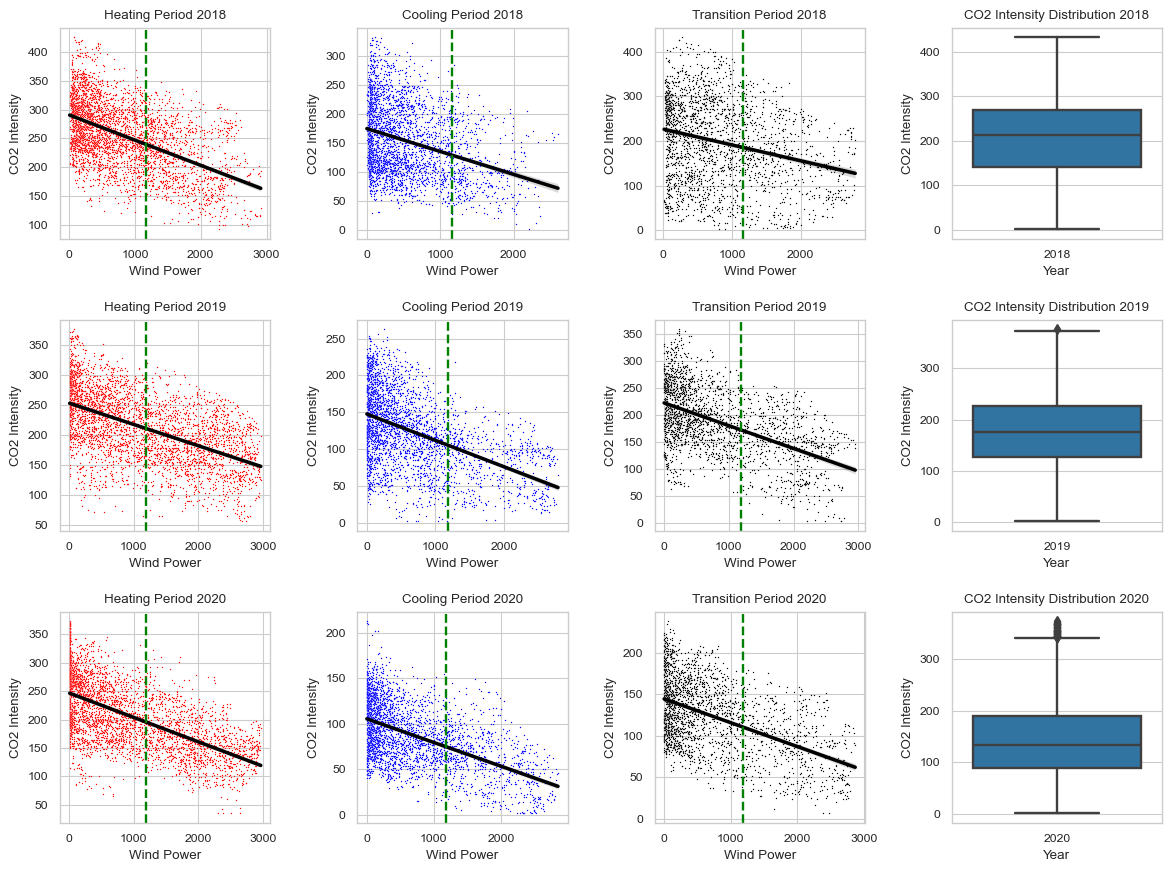

In [54]:
# # Adjusting the code to include regression lines, 40% cut-off markings, and color-coded points

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
df = combined_data

# Function to plot scatter and boxplot for a given year
def plot_yearly_data_with_regression(df, year, row):
    # Filter data for the given year
    year_data = df[df['Year'] == year]

    # Calculate 40% of the annual maximum for wind power
    max_wind_40_percent = df[df['Year'] == year]['Wind Power'].max() * 0.4

    # Plotting for Heating Period
    sns.scatterplot(data=year_data[year_data['Heizen']], x='Wind Power', y='CO2 Intensity', ax=axes[row, 0], color='red',s=1)
    sns.regplot(data=year_data[year_data['Heizen']], x='Wind Power', y='CO2 Intensity', ax=axes[row, 0], scatter=False, color='black')
    axes[row, 0].axvline(x=max_wind_40_percent, color='green', linestyle='--')
    axes[row, 0].set_title(f'Heating Period {year}')
    axes[row, 0].set_xlabel('Wind Power')
    axes[row, 0].set_ylabel('CO2 Intensity')

    # Plotting for Cooling Period
    sns.scatterplot(data=year_data[year_data['Kühlen'] == 1], x='Wind Power', y='CO2 Intensity', ax=axes[row, 1], color='blue',s=1)
    sns.regplot(data=year_data[year_data['Kühlen'] == 1], x='Wind Power', y='CO2 Intensity', ax=axes[row, 1], scatter=False, color='black')
    axes[row, 1].axvline(x=max_wind_40_percent, color='green', linestyle='--')
    axes[row, 1].set_title(f'Cooling Period {year}')
    axes[row, 1].set_xlabel('Wind Power')
    axes[row, 1].set_ylabel('CO2 Intensity')

    # Plotting for Transition Period
    sns.scatterplot(data=year_data[(year_data['Heizen'] == False) & (year_data['Kühlen'] == 0)], x='Wind Power', y='CO2 Intensity', ax=axes[row, 2], color='black',s=1)
    sns.regplot(data=year_data[(year_data['Heizen'] == False) & (year_data['Kühlen'] == 0)], x='Wind Power', y='CO2 Intensity', ax=axes[row, 2], scatter=False, color='black')
    axes[row, 2].axvline(x=max_wind_40_percent, color='green', linestyle='--')
    axes[row, 2].set_title(f'Transition Period {year}')
    axes[row, 2].set_xlabel('Wind Power')
    axes[row, 2].set_ylabel('CO2 Intensity')

    # Boxplot for the year
    sns.boxplot(data=year_data, x='Year', y='CO2 Intensity', ax=axes[row, 3])
    axes[row, 3].set_title(f'CO2 Intensity Distribution {year}')
    axes[row, 3].set_xlabel('Year')
    axes[row, 3].set_ylabel('CO2 Intensity')

# Plotting for each year
for i, year in enumerate([2018, 2019, 2020]):
    plot_yearly_data_with_regression(df, year, i)

plt.tight_layout()
plt.show()


In [14]:
df

,Wind Power,CO2 Intensity,Heizen,Kühlen,MONAT,Year
datetime,,,,,,
2019-01-01 00:00:00+00:00,914.630,145.484424,True,0,1,2018
2019-01-01 01:00:00+00:00,832.387,139.960877,True,0,1,2018
2019-01-01 02:00:00+00:00,926.463,141.285416,True,0,1,2018
2019-01-01 03:00:00+00:00,691.546,147.098838,True,0,1,2018
2019-01-01 04:00:00+00:00,453.314,147.657319,True,0,1,2018
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,259.000,245.127660,True,0,12,2020
2019-12-31 20:00:00+00:00,296.000,241.587692,True,0,12,2020
2019-12-31 21:00:00+00:00,425.000,247.057096,True,0,12,2020


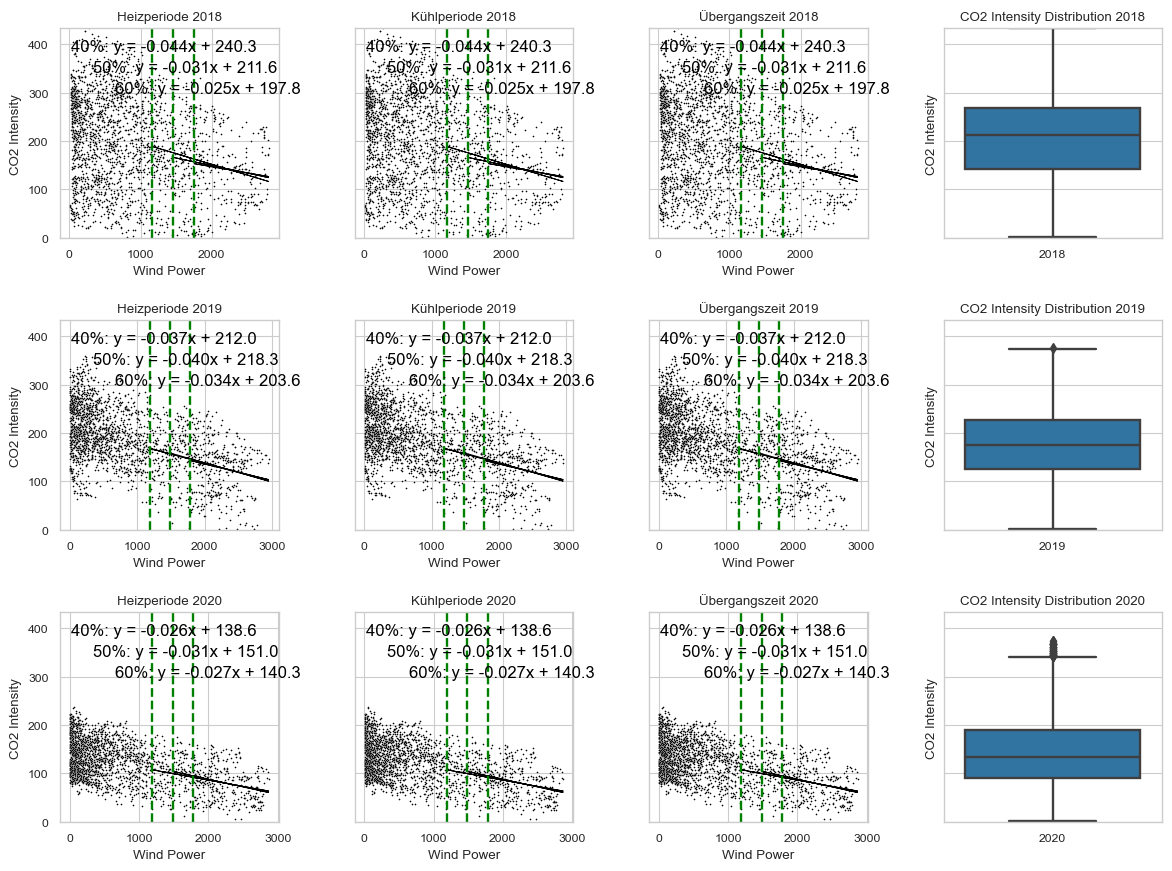

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_data' is the DataFrame obtained from your previous operations
df = df
cutoffs = [0.4, 0.5, 0.6]

# Function to fit regression and return equation
def fit_regression_and_get_equation(data):
    if data.empty:
        return "No Data", 0, 0

    # Fit regression
    X = data['Wind Power']
    y = data['CO2 Intensity']
    m, b = np.polyfit(X, y, 1)
    equation = f"y = {m:.3f}x + {b:.1f}"
    return equation, m, b

# Function to plot scatter and boxplot for a given year
def plot_yearly_data_with_regression(df, year, row, max_co2_intensity):
    year_data = df[df['Year'] == year]

    for i, condition in enumerate(['Heizperiode', 'Kühlperiode', 'Übergangszeit']):
        # Define data for each condition
        if condition == 'Heizen':
            condition_data = year_data[year_data['Heizen']]
            color = 'red'
            
        elif condition == 'Kühlen':
            condition_data = year_data[year_data['Kühlen'] == 1]
            color = 'blue'
        else: # Transition
            condition_data = year_data[(year_data['Heizen'] == False) & (year_data['Kühlen'] == 0)]
            color = 'black'
        

        for j, cutoff in enumerate(cutoffs):
            
            max_Wind = year_data['Wind Power'].max() * cutoff
            #max_Wind = condition_data['Wind Power'].max() * cutoff
            max_wind_data = condition_data[condition_data['Wind Power' ]> max_Wind]
            # Regression line and equation
            equation, m, b = fit_regression_and_get_equation(max_wind_data)
            ax = axes[row, i]
            sns.scatterplot(data=condition_data, x='Wind Power', y='CO2 Intensity', color=color, ax=ax, s=1)
            if m != 0 and b != 0:  # If data available for regression
                ax.plot(max_wind_data['Wind Power'], m * max_wind_data['Wind Power'] + b, color=color, linewidth=0.7)
                ax.text(0.05+j*0.10, 0.95-j*0.1, f"{cutoff*100:.0f}%: {equation}", transform=ax.transAxes, verticalalignment='top', color="black", fontsize=12)
                
                #ax.text(max_Wind, 0.05, f"{cutoff*100:.0}%", transform=ax.transAxes, verticalalignment='top', color=color)
                ax.axvline(x=max_Wind, color="green", linestyle='--')

        ax.set_title(f'{condition} {year}')
        ax.set_xlabel('Wind Power')
        ax.set_ylabel('CO2 Intensity')
        ax.set_ylim([0, max_co2_intensity])

    # Boxplot for the year
    
    sns.boxplot(data=year_data, x='Year', y='CO2 Intensity', ax=axes[row, 3])
    axes[row, 3].set_title(f'CO2 Intensity Distribution {year}')
    axes[row, 3].set_xlabel('')
    axes[row, 3].set_ylim([0, max_co2_intensity])

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), sharey=True)

# Determine the global maximum CO2 intensity for consistent y-axis scale
max_co2_intensity = df['CO2 Intensity'].max()

# Plotting for each year
for i, year in enumerate([2018, 2019, 2020]):
    plot_yearly_data_with_regression(df, year, i, max_co2_intensity)

plt.tight_layout()
plt.show()



C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\4247452792.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data['Periode'] = condition
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\4247452792.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_data["Cut-Off"] = cutoff
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_20448\4247452792.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

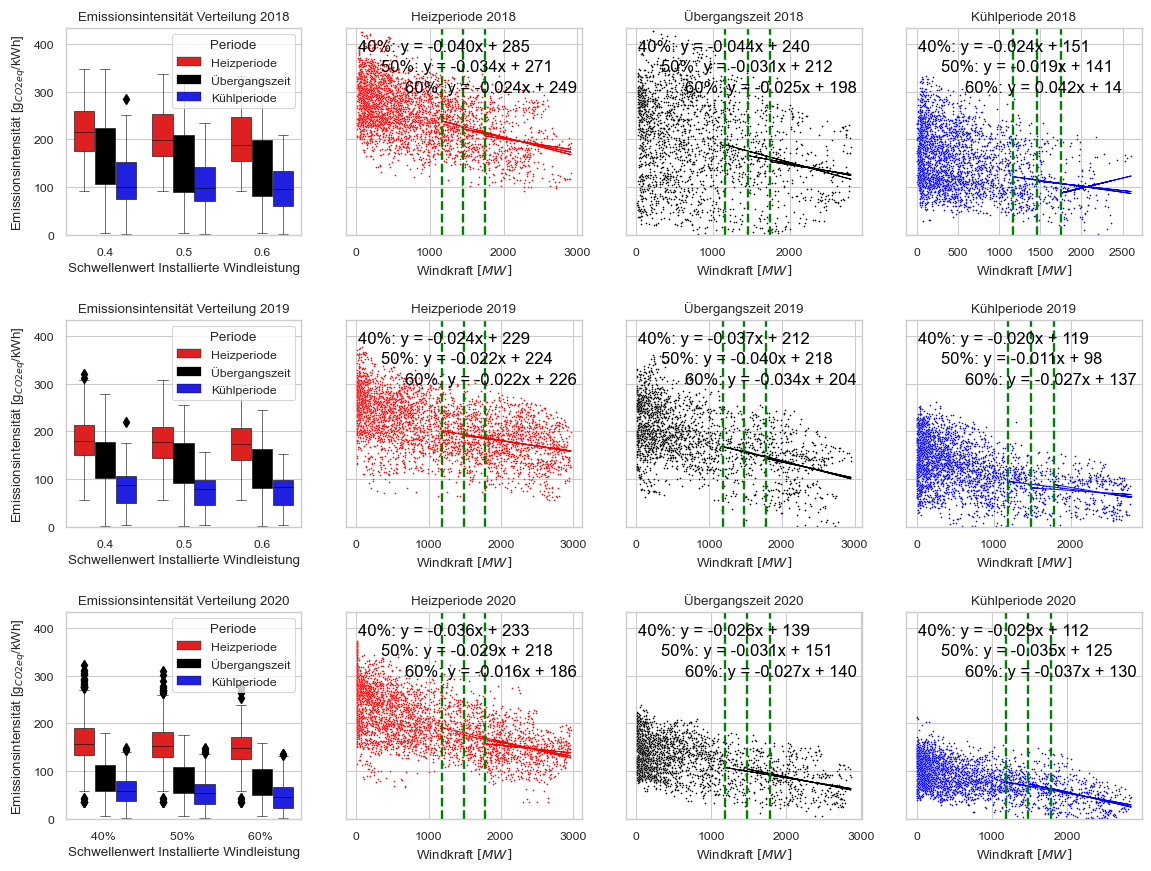

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_data' is the DataFrame obtained from your previous operations
df = df
cutoffs = [0.4, 0.5, 0.6]

# Function to fit regression and return equation
def fit_regression_and_get_equation(data):
    if data.empty:
        return "No Data", 0, 0

    # Fit regression
    X = data['Wind Power']
    y = data['CO2 Intensity']
    m, b = np.polyfit(X, y, 1)
    equation = f"y = {m:.3f}x + {b:.0f}"
    return equation, m, b

# Function to plot scatter and boxplot for a given year
def plot_yearly_data_with_regression(df, year, row, max_co2_intensity):
    year_data = df[df['Year'] == year]

    # Prepare data for boxplot
    boxplot_data = pd.DataFrame()

    for i, condition in enumerate(['Heizperiode', 'Übergangszeit', 'Kühlperiode']):
        # Define data for each condition
        if condition == 'Heizperiode':
            condition_data = year_data[year_data['Heizen']]
            color = 'red'
        elif condition == 'Kühlperiode':
            condition_data = year_data[year_data['Kühlen'] == 1]
            color = 'blue'
        else: # Transition
            condition_data = year_data[(year_data['Heizen'] == False) & (year_data['Kühlen'] == 0)]
            color = 'black'
        
        # Append condition data with condition label for boxplot

        for j, cutoff in enumerate(cutoffs):

            
            condition_data['Periode'] = condition
            condition_data["Cut-Off"] = cutoff
            max_Wind = year_data['Wind Power'].max() * cutoff
            #max_Wind = condition_data['Wind Power'].max() * cutoff
            max_wind_data = condition_data[condition_data['Wind Power' ]> max_Wind]

            boxplot_data = boxplot_data.append(max_wind_data)
            # Regression line and equation
            equation, m, b = fit_regression_and_get_equation(max_wind_data)
            ax = axes[row, i+1]
            sns.scatterplot(data=condition_data, x='Wind Power', y='CO2 Intensity', color=color, ax=ax, s=1)
            
            if m != 0 and b != 0:  # If data available for regression
                ax.plot(max_wind_data['Wind Power'], m * max_wind_data['Wind Power'] + b, color=color, linewidth=0.7)
                ax.text(0.05 + j * 0.10, 0.95 - j * 0.1, f"{cutoff * 100:.0f}%: {equation}", transform=ax.transAxes, verticalalignment='top', color="black", fontsize=12)
                ax.axvline(x=max_Wind, color="green", linestyle='--')

            ax.set_title(f'{condition} {year}')
            ax.set_xlabel('Windkraft $[MW]$')
            ax.set_ylabel("Emissionsintensität [g$_{CO2eq}$/kWh]")
            ax.set_ylim([0, max_co2_intensity])

    # Boxplot for each condition in the year
    sns.boxplot(data=boxplot_data, x='Cut-Off', y='CO2 Intensity', ax=axes[row, 0], hue="Periode", palette={'Heizperiode': 'red', 'Kühlperiode': 'blue', 'Übergangszeit': 'black'}, linewidth=.4)
    axes[row, 0].set_title(f'Emissionsintensität Verteilung {year}')
    axes[row, 0].set_xlabel('Schwellenwert Installierte Windleistung')
    axes[row, 0].set_ylim([0, max_co2_intensity])
    axes[i, 0].set_xticklabels([f"{int(cutoff * 100)}% " for cutoff in cutoffs])

    axes[row, 0].set_ylabel("Emissionsintensität [g$_{CO2eq}$/kWh]")

# Creating a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9), sharey=True)

# Determine the global maximum CO2 intensity for consistent y-axis scale
max_co2_intensity = df['CO2 Intensity'].max()

# Plotting for each year
for i, year in enumerate([2018, 2019, 2020]):
    plot_yearly_data_with_regression(df, year, i, max_co2_intensity)

plt.tight_layout()


plt.savefig("Plots/corrWindCo2.png", dpi=300, format="png")


LinAlgError: SVD did not converge in Linear Least Squares

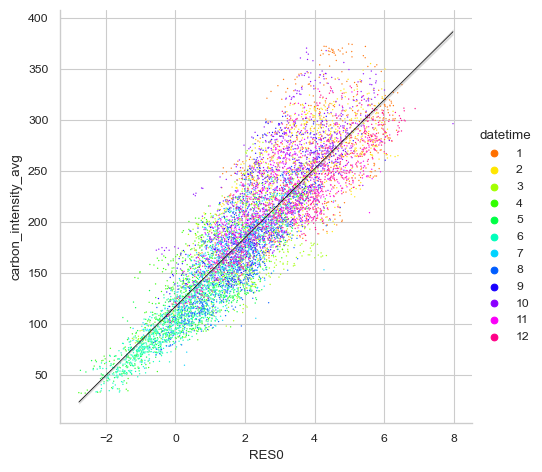

In [61]:
def fit_regression_and_get_equation(data,xlabel, ylabel):
    if data.empty:
        return "No Data", 0, 0

    # Fit regression
    X = data[xlabel]
    y = data[ylabel]
    m, b = np.polyfit(X, y, 1)
    equation = f"y = {m:.3f}x + {b:.0f}"
    return equation, m, b

br = sns.color_palette("plasma", 6)
rb = sns.color_palette("plasma", 6) # coolwarm
 # Set the middle color to blue
pal = br + br[::-1]
pal = sns.color_palette("hsv", 12)


ax = sns.relplot(data=rel, x="res0", y="co2", hue=rel.index.month, s=1, alpha=1, palette=pal)
#ax = sns.regplot(x=res0,y=co2, line_kws=dict(linewidth=0.5, color="black"), scatter_kws={'alpha':0.5,"s":0.0, "color":"grey"}, order=2, ci=99)
ax = sns.regplot(x=res0,y=co2, line_kws=dict(linewidth=0.5, color="black"), scatter_kws={'alpha':0.0, "color":"grey"}, order=1, ci=99)


equation, m, b = fit_regression_and_get_equation(rel, "res0", "co2")

ax.text(0.05, 0.95, f" {equation}", transform=ax.transAxes, verticalalignment='top', color="black", fontsize=12)

ax.legend().set_title("Monat")
ax.set_xlabel("Residuallast $RES_{VOL} [GW]$")
ax.set_ylabel("Emissionsintensität[g$_{CO2eq}$/kWh]")


#sns.relplot(data=rel, x="res0", y="co2", hue=rel.index.month, alpha=0.2, palette=pal)